## Using PCA and tSNE to explore fuel economy of older automobiles.

Julia A. Moffitt, PhD

-----------------------------
## Objective: 
-----------------------------
The objective of this notebook was to explore the data and reduce the number of features by using dimensionality reduction techniques like PCA and TSNE. 

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Importing necessary libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading data

In [2]:
data = pd.read_csv("auto-mpg.csv")

In [3]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
5,15.0,8,429.0,198,4341,10.0,70,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,amc ambassador dpl


#### Check the info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. We will explore this further.

## Data Preprocessing and Exploratory Data Analysis

In [5]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [6]:
# dropping car_name
data1 = data.copy()
data = data.drop(['car name'], axis=1)

#### Checking values in horsepower column

In [7]:
# checking if there are values other than digits in the column 'horsepower' 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print isDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- Let's impute these missing values and change the data type of horsepower column.
- First we need to replace the ? with np.nan.

In [8]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [9]:
# Imputing the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

#### Summary Statistics

In [10]:
#Write your code here
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
data.cylinders.median()

4.0

**Observations:**
* The average MPG of these cars is 23.5 mpg
* I calculated the median value cylinders, which seems more appropriate than mean, which is 4 cylinders for the data set
* These cars have an average horsepower of 104
* Acceleration is 15.6 s to go 0 to 60 mph
* The average model year is 1976
* The weight of these vehicles ranges from 1613 to 5140 with a mean of 2970

#### Checking the distribution and outliers for each column in the data

mpg
Skew : 0.46


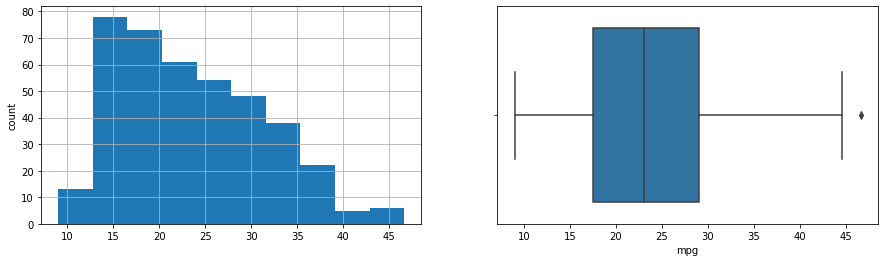

cylinders
Skew : 0.53


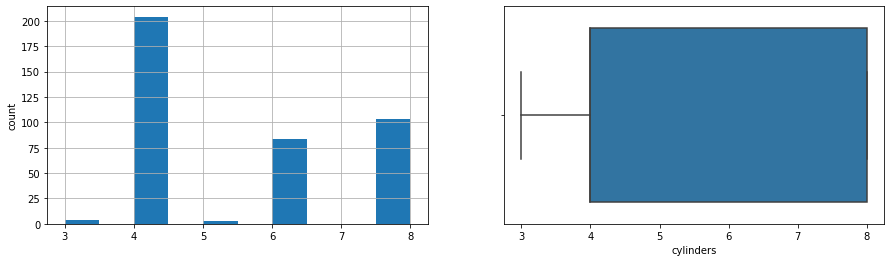

displacement
Skew : 0.72


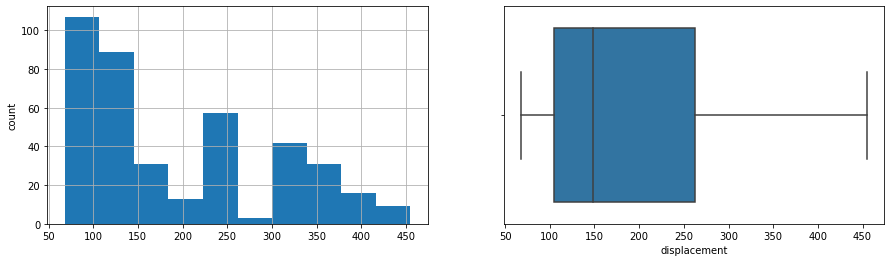

horsepower
Skew : 1.11


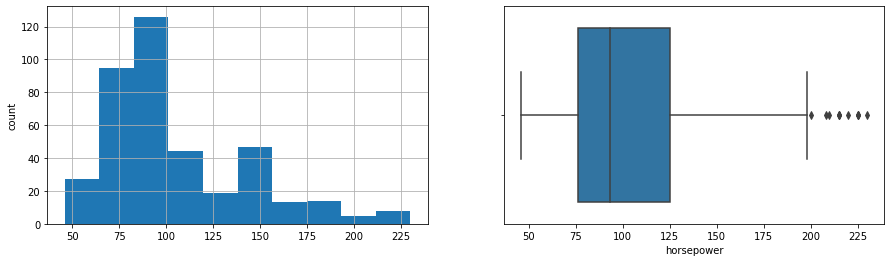

weight
Skew : 0.53


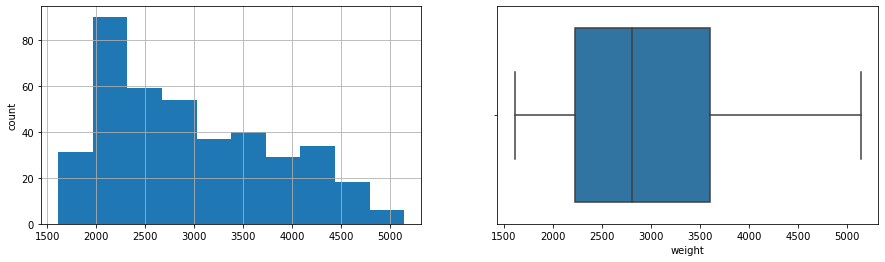

acceleration
Skew : 0.28


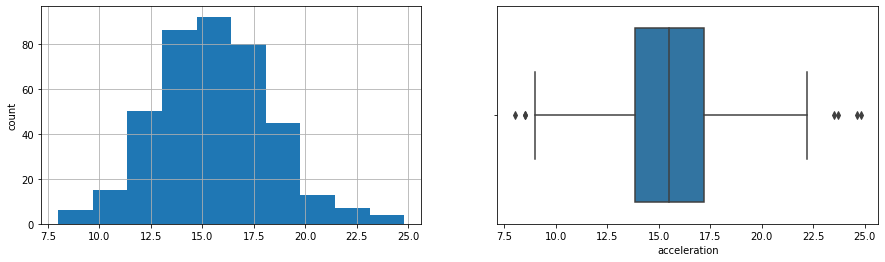

model year
Skew : 0.01


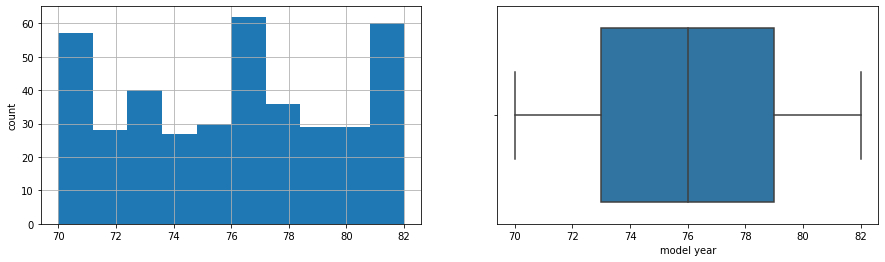

In [12]:
# Uncomment and complete the code by filling the blanks 

for col in data.columns:
     print(col)
     print('Skew :',round(data[col].skew(),2))
     plt.figure(figsize=(15,4))
     plt.subplot(1,2,1)
     data[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x=data[col])
     plt.show()

In [22]:
data[data['mpg'] > 45]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
322,46.6,4,86.0,65.0,2110,17.9,80


In [23]:
df=data[data['horsepower'] > 190]
df['horsepower'].value_counts()

225.0    3
215.0    3
198.0    2
230.0    1
200.0    1
220.0    1
193.0    1
208.0    1
210.0    1
Name: horsepower, dtype: int64

In [27]:
data[data['acceleration'] > 22.5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
59,23.0,4,97.0,54.0,2254,23.5,72
299,27.2,4,141.0,71.0,3190,24.8,79
326,43.4,4,90.0,48.0,2335,23.7,80
394,44.0,4,97.0,52.0,2130,24.6,82


In [29]:
data[data['acceleration'] < 9]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
7,14.0,8,440.0,215.0,4312,8.5,70
9,15.0,8,390.0,190.0,3850,8.5,70
11,14.0,8,340.0,160.0,3609,8.0,70


**Observations:**
* MPG data are skewed right, thus more cars in the distribution have a lower mpg
* There is one outlier, a 1990 vehicle with 46.6 mpg
* Most cars are 4, 6 and 8 cylinder, respectively in descending rank, with very few 3 or 5 clyinder.
* Models range form 1970-1982, with a median of 1976.  
* Horsepower is also skewed right with most cars having ~90 horspower (n=120).
* There are 14 outliers for cars that have a horsepower greater than 190 horsepower.  
* The weight of cars is also skewed right, with most cars having a weight of ~2200. No outliers exist.
* Acceleration is normally distributed.  A few outliers exist on both the low and high end of the range for this parameter.  There are 3 cars that accelerate exceedingly fast and have 8 cylinders at a relatively low weight and high horsepower, while cars that are outliers taking the longest time to accelerate (> 22.5 s) are only 4 cylinders and have a low horsepower.  There are 4 cars in that category.



#### Correlation analysis

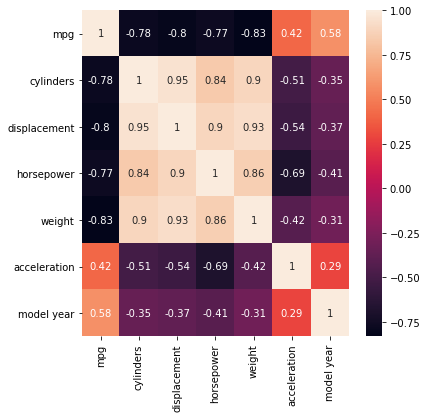

In [32]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

#### Scaling the data

In [33]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [35]:
data_scaled

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983


## Principal Component Analysis

In [36]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Apply the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_



Text(0, 0.5, 'Cumulative Explained Variance')

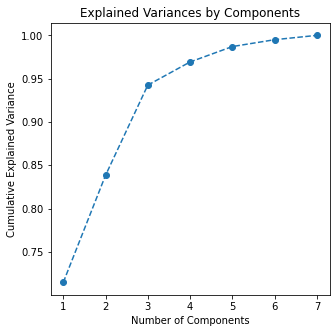

In [38]:
# visualize the explained variance by individual components
plt.figure(figsize = (5,5))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [39]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**Observations:**
* 3 principle components were able to explain 95% of the variance in the data set.  
* This was a natural break point and easy to see from the visualisation of the component-variance plot. 
* This seems to be an ideal situation in which the dimensions of the data were able to be reduced to only 3 components and still retain a great deal of the variance in the data!

In [40]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


In [41]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**
* PC1 was related to the inverse relationship between fuel economy and engine power and size.  The greater the engine size, number of cylinders, weight of the vehicle and horsepower, the lower the fuel economy (MPG).
* The only important parameter for PC2 was the model year which was inversely related to PC2.  This would make sense as cars and engines change over time.
* Similarly, only the time to accelerate was an important feature of PC3.

#### Visualizing the data in 2 dimensions using first two principal components 

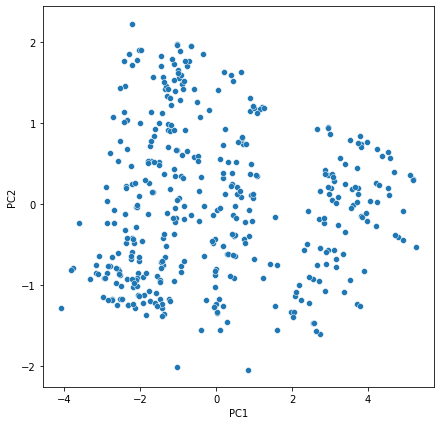

In [42]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Let's try adding hue to the scatter plot**

#### Question 5: 

- **Create a scatter plot for first two principal components with hue = 'cylinders' (2 Marks)** 
- **Write your observations on the plot (2 Marks)**

Text(0, 0.5, 'PC2')

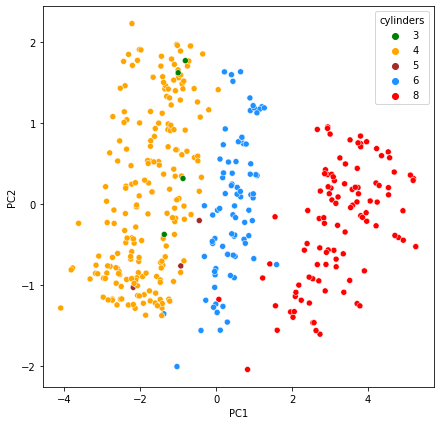

In [67]:
df_concat = pd.concat([data_pca1, data], axis=1)
df_concat

plt.figure(figsize = (7,7))
#Create a scatter plot with x=0 and y=1 using df_concat dataframe
sns.scatterplot(x=data_pca1[0],y=data_pca1[1], data=df_concat, hue='cylinders', palette=['green','orange','brown','dodgerblue','red'])
plt.xlabel("PC1")
plt.ylabel("PC2")

**Observations:**

* The parameter of cylinders clearly can be seen across the levels of cylinders (3 to 8) as it was identified as the most important feature of PC1.  
* Each level of cylinder clusters together nicely according to different levels of PC1, which reinforces that this paramameter explains a great deal of the variance projected onto PC1.    

## t-SNE

In [59]:
tsne = TSNE(n_components = 2, random_state=1)#Apply the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(data_scaled)#Fit and transform tsne function on the scaled data

In [60]:
data_tsne.shape

(398, 2)

In [61]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [62]:
data_tsne.head()

,Component 1,Component 2
0,-38.088413,-15.912958
1,-37.404369,-17.995850
2,-38.050472,-17.063194
3,-37.718334,-16.476006
4,-38.404663,-16.763493


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

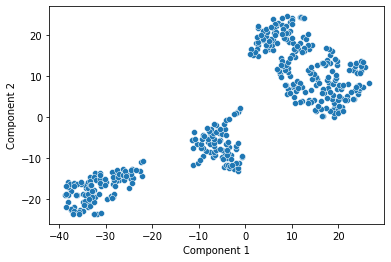

In [63]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

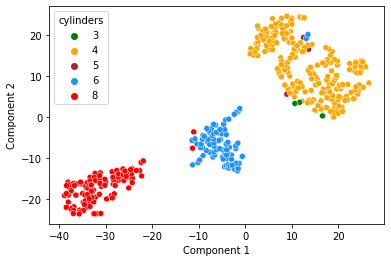

In [68]:
# Let's see scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data.cylinders, palette=['green','orange','brown','dodgerblue','red'])

**Observations:**

* t-SNE plot of cylinders shows clearly defined clusters at a 4, 6 and 8 cylinders.  
* Although there were 5 different levels of cylinders, really only 3 groups emerged that explain the majority of variance of PC1, that is 4,6 and 8 cylinders.  

In [69]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component> 0) and (second_component >0): 
        return 'group_1'
    if (first_component >-20 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

In [70]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

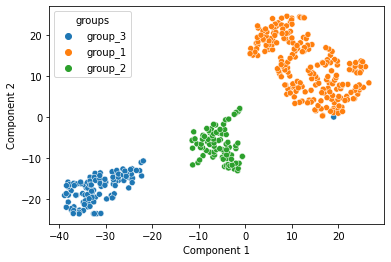

In [71]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

In [72]:
data['groups'] = data_tsne['groups'] 

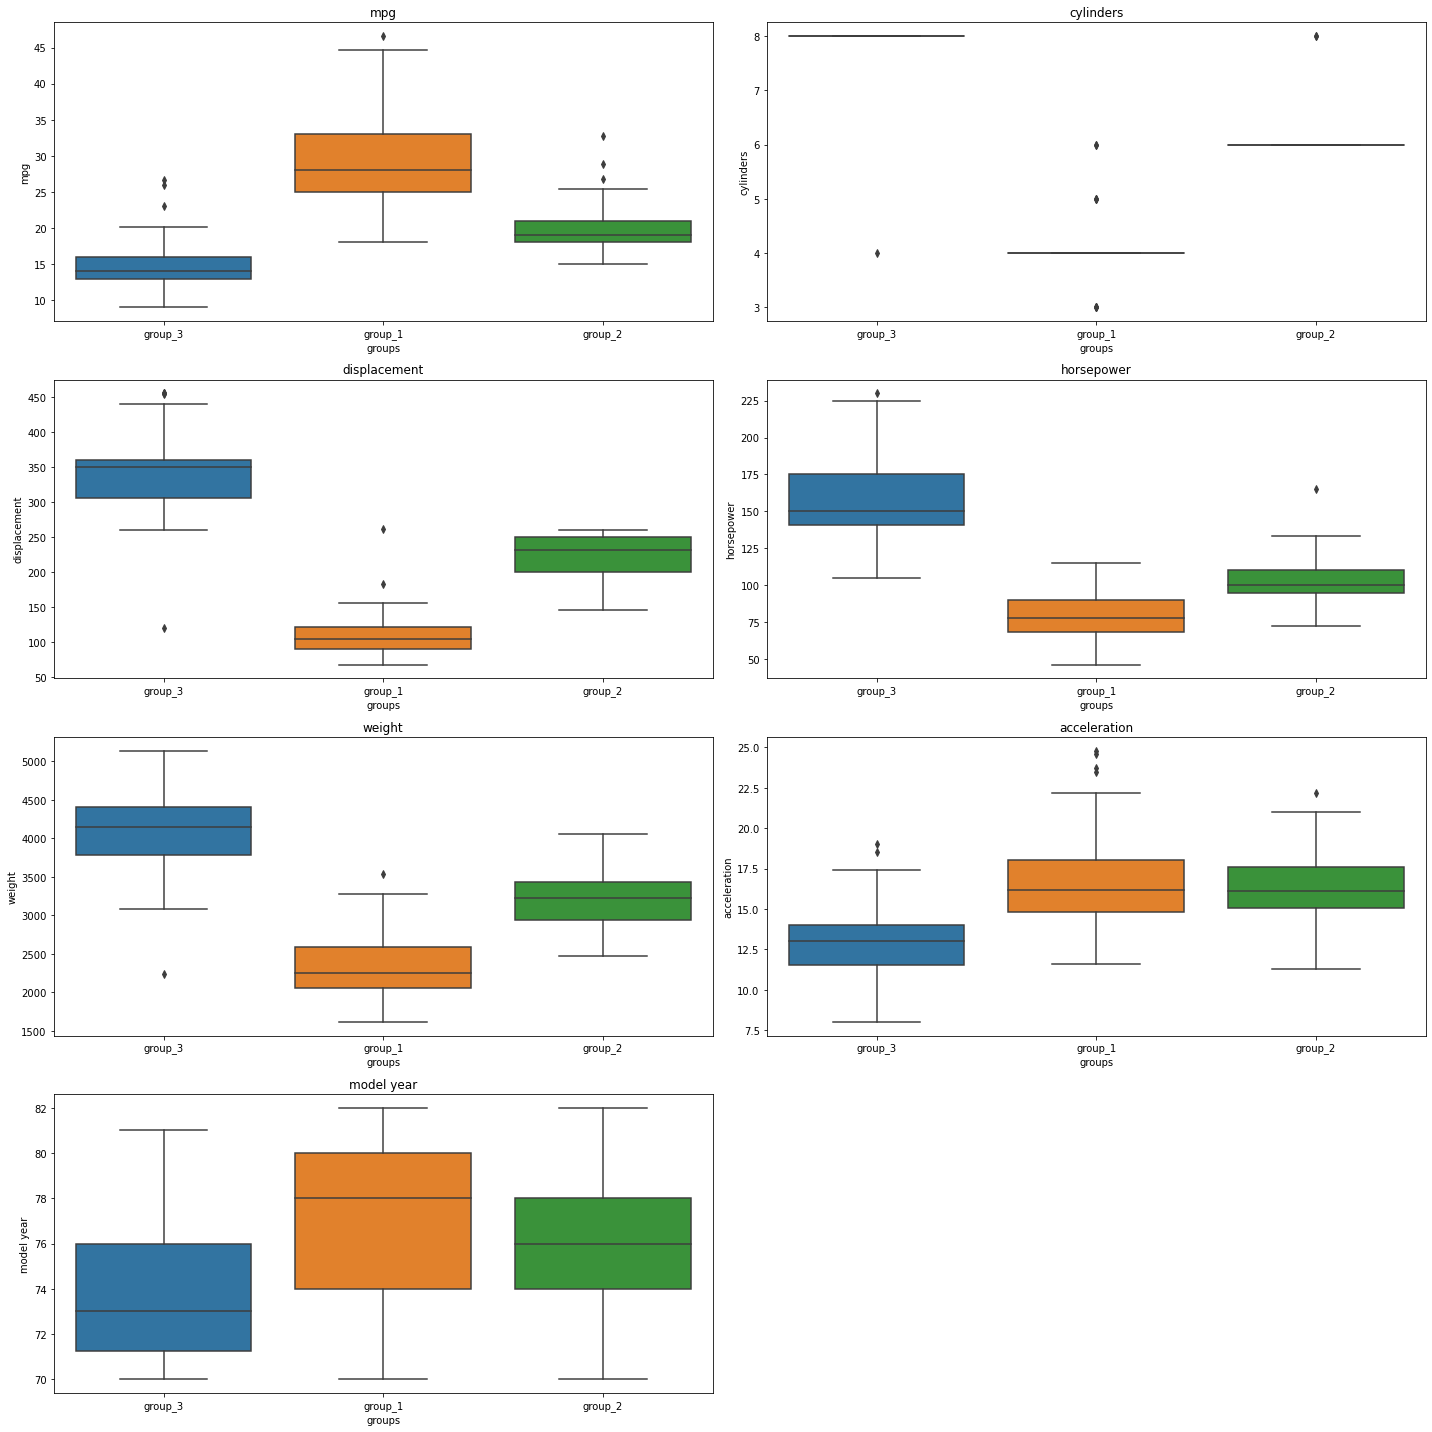

In [73]:
all_col = data.columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    #Create boxplot with groups on the x-axis and variable on the y-axis (use the dataframe data)
    sns.boxplot(y=data[variable], x=data_tsne['groups'])
    plt.tight_layout()
    plt.title(variable)
plt.show()



**Observations:**
* Group 1, which contains mostly 4 cylinder cars, had the highest MPG, which makes sense in terms of fuel economy. Group 2 (mostly 6 cylinder cars) was lower and Group 3, mostly 8 cylinder cars had the lowest MPG.
* Cylinders which was used to define the groups had no variation with makes sense.
* Group 3 cars, with mostly 8 cylinder vehicles had the highest displacement or largest engine.
* Horsepower, had very little variation in terms of scaling with 8, 6, and 4 cylinder cars having the most relative horsepower, respectively.
* Group 3 cars were of the highest weight while group 1 was lowest and group 2 between, which also correspondes to number of cylinders and engine size.
* Time to accelerate was lowest for group 3 which makes sense as these were primarily 8 cylinder cars.  Groups 1 and 2 took longer and were similar.
* Group 3 cars tended to be older model cars, while gorup 1 were newer.  This makes sense as over time as higher fuel economy became more important than engine size, cars were manufactured with fewer cylinders.  